In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate synthetic but realistic student stress data
X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_informative=5,
    n_redundant=1,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

df = pd.DataFrame(X, columns=[
    "study_hours",
    "sleep_hours",
    "screen_time",
    "physical_activity",
    "academic_load",
    "social_activity"
])

df["stress_level"] = y  # 0 = Low, 1 = Medium, 2 = High

df.head()


,study_hours,sleep_hours,screen_time,physical_activity,academic_load,social_activity,stress_level
0,0.205571,1.440546,0.367153,-1.697667,-0.533507,0.988325,0
1,-1.053849,0.670381,-0.317449,-1.848933,3.055172,2.478195,1
2,0.678742,1.939990,-0.240370,-1.170109,-0.454056,0.673015,0
3,1.478955,-1.644825,1.286418,1.501687,-1.869820,-2.256284,2
4,-3.842269,-0.003532,1.413530,-1.715552,6.281657,0.794506,1


PHASE 1 : Logistic Regression (Baseline)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("stress_level", axis=1)
y = df["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Train Logistic Regression


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.972

Confusion Matrix

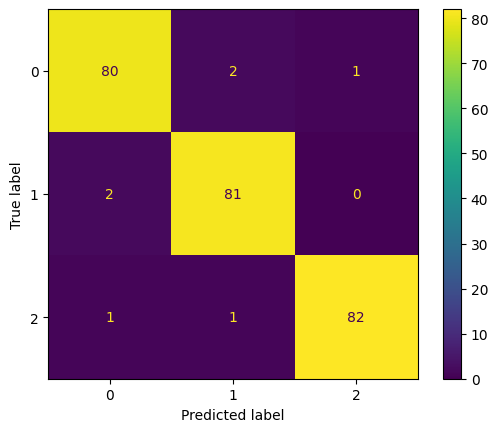

In [7]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()

PHASE 2: Random Forest Accuracy

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.972


Random Forest Confusion Matrix


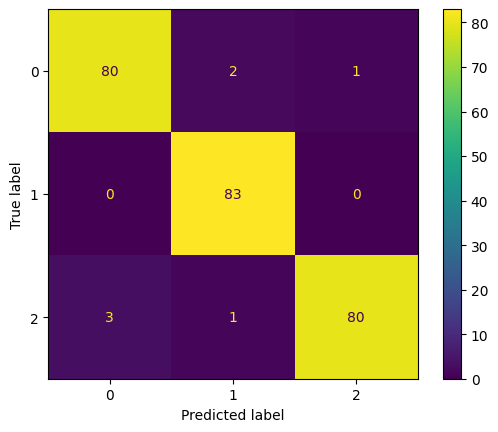

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()

Feature Importance (Random Forest)”

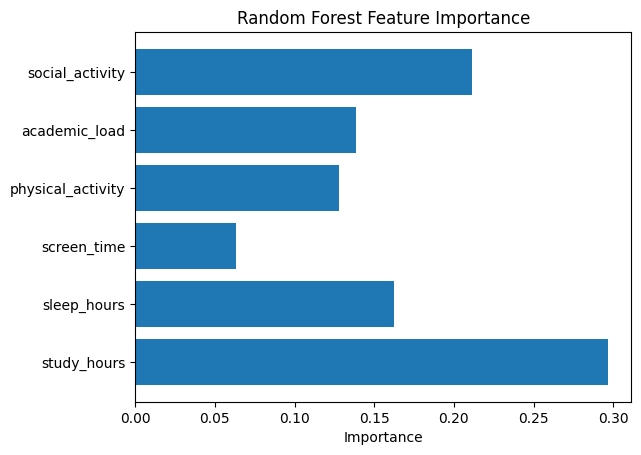

In [10]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_

plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

PHASE 3 : Neural Network


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Train Neural Network

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_nn = mlp.predict(X_test_scaled)
acc_nn = accuracy_score(y_test, y_pred_nn)
acc_nn

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.996

Neural Network Confusion Matrix

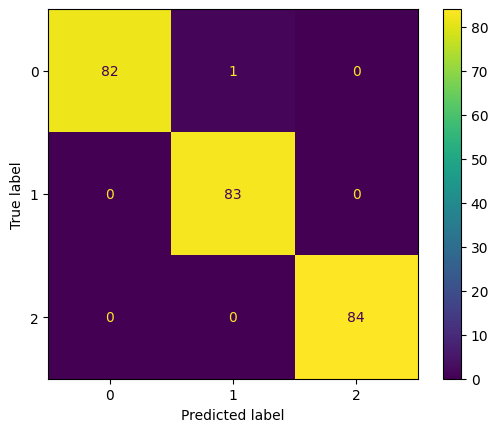

In [13]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()